In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [31]:
df = pd.read_csv('hotelbookingdata.csv')

In [32]:
df.head(6)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

### Questions
What hotel had the most deposit payments per child?

WHat month had more cancellations than the other

Is there a correlation between the number of children or babies and required car parking spaces per booking?

What hotel had the most bookings but had the shortest days in waiting list.

What hotels are the most popular?






### Data cleaning for EBA
Here you can see that there are some invalid data entries within the dataframe. Here we can see we have bookings where there are no adults, children and babies entered for thse 180 instances.

Most standard hotel booking websites such as Booking.com, Trivago selecting the personnel is a mandatory process in order to fullfill a booking request.

This lead me to tht conclusion that we must remove these invalid instances from the data set.

In [33]:
df[(df['adults'] ==0)& (df['children'] ==0)&(df['babies'] ==0)][['adults','children','babies','is_canceled']]

,adults,children,babies,is_canceled
2224,0,0.0,0,0
2409,0,0.0,0,0
3181,0,0.0,0,0
3684,0,0.0,0,0
3708,0,0.0,0,0
...,...,...,...,...
115029,0,0.0,0,0
115091,0,0.0,0,0
116251,0,0.0,0,0
116534,0,0.0,0,0


Looking further for invalid data I began to see more valid entries. An example is that to create a booking there must be atleast 1 adult.

These instances are technically invalid when looking at real world examples.

In [34]:
df[(df['adults'] ==0)&((df['children']!=0)|(df['babies']!=0))][['adults','children','babies']]

,adults,children,babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
41952,0,2.0,0
45158,0,2.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [35]:
# Dropping the bookings from the data set
df.drop(df[(df['adults'] ==0)& (df['children'] ==0)&(df['babies'] ==0)].index,inplace=True)

In [8]:
cityhotel = df[df['hotel']=='City Hotel'][['is_canceled','reservation_status_date']]
cityhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79163 entries, 40060 to 119389
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   is_canceled              79163 non-null  int64 
 1   reservation_status_date  79163 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [9]:
cityhotel['reservation_status_date'] = pd.to_datetime(cityhotel['reservation_status_date'])

In [10]:
cityhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79163 entries, 40060 to 119389
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   is_canceled              79163 non-null  int64         
 1   reservation_status_date  79163 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 MB


In [11]:
cityhotel['reservation_status_date'].iloc[0].month == 7

True

In [12]:
cityhotel[cityhotel['reservation_status_date'].apply(lambda x: (x.month == 7)&(x.year == 2015))][['is_canceled','reservation_status_date']]

,is_canceled,reservation_status_date
40060,0,2015-07-03
40061,1,2015-07-01
40066,0,2015-07-05
40068,1,2015-07-02
40069,1,2015-07-02
...,...,...
76618,0,2015-07-26
76619,0,2015-07-28
76621,0,2015-07-31
76625,0,2015-07-31


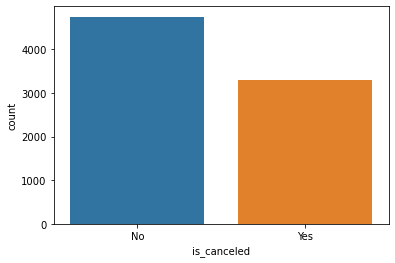

In [13]:
Cityhotel_Aug = cityhotel[cityhotel['reservation_status_date'].apply(lambda x: x.month == 7)][['is_canceled','reservation_status_date']]
Cityhotel_Aug['is_canceled'].replace({1:'Yes',0:'No'},inplace =True)
sns.countplot('is_canceled',data = Cityhotel_Aug)

In [14]:
Cityhotel_Aug['reservation_status_date'].apply(lambda x:x.year).value_counts()


2016    3021
2017    2669
2015    2358
Name: reservation_status_date, dtype: int64

In [15]:
#Aug_Bookings = df[df['reservation_status_date'].apply(lambda x: x.month == 7)][['hotel','is_canceled','reservation_status_date']]

In [16]:
#customers who have cancelled the most and have cancelled previously
df[df['is_canceled']==1][['is_canceled','previous_cancellations']].sort_values(by='previous_cancellations',ascending=False)


,is_canceled,previous_cancellations
14785,1,26
14793,1,26
14784,1,26
14803,1,26
14802,1,26
...,...,...
49195,1,0
49196,1,0
49197,1,0
49198,1,0


What hotel had the the most non refundable bookings who had children


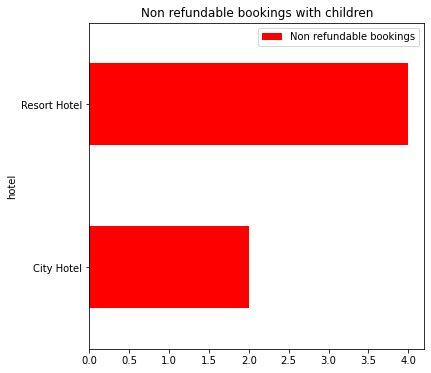

In [17]:
df[(df['deposit_type']=='Non Refund') & (df['children']>0.0)][['hotel','deposit_type']].groupby(['hotel']).count().plot(
    kind = 'barh',figsize=(6,6),color='red',title='Non refundable bookings with children')
plt.legend(['Non refundable bookings'])


Display the number of canceled booking per momth

In [18]:
df['reservation_status_date']  = pd.to_datetime(df['reservation_status_date'])

In [19]:
df['reservation_month'] = df['reservation_status_date'].apply(lambda x: x.month)

In [20]:
df['day_of_week'] = df['reservation_status_date'].apply(lambda x:x.weekday())

In [21]:
Cancelled_Count = df[df['is_canceled']==1][['reservation_month','is_canceled']].groupby(['reservation_month']).count()
Cancelled_Count

Booking_Count = df[df['is_canceled']==0][['reservation_month','is_canceled']].groupby(['reservation_month']).count()

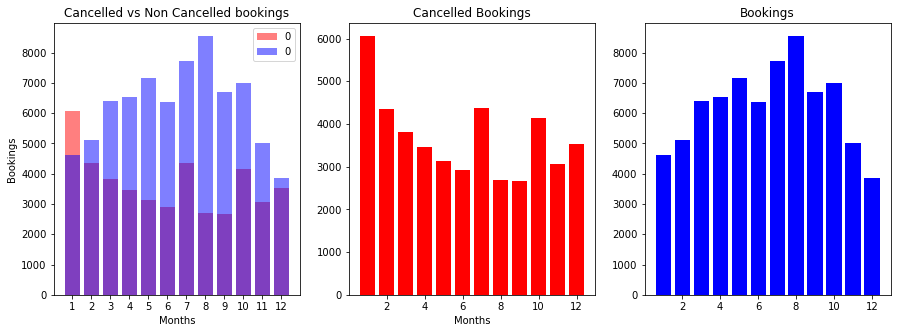

In [22]:
fig, axes = plt.subplots(1,3,figsize=(15,5));
Months1 = Booking_Count.index
Values1 = Booking_Count['is_canceled']
Months2 = Cancelled_Count.index
Values2 = Cancelled_Count['is_canceled']
axes[0].bar(Months2,Values2,color='Red',alpha=0.5)
axes[0].set_xticks(Months2)
axes[0].set_title('Cancelled vs Non Cancelled bookings')
axes[0].set_xlabel('Months')
axes[1].set_xlabel('Months')
axes[0].set_ylabel('Bookings')
axes[0].bar(Months1,Values1,color='Blue',alpha =0.5)
axes[0].legend(df['is_canceled'])
axes[1].set_title('Cancelled Bookings')
axes[1].bar(Months2,Values2,color='red')
axes[2].set_title('Bookings')
axes[2].bar(Months1,Values1,color='blue')
plt.show()


In [23]:
df[df['hotel'] =='Resort Hotel'][['meal','adults','children','babies']].groupby('meal').sum()

,adults,children,babies
meal,,,
BB,55293,3819.0,365
FB,1510,78.0,23
HB,15729,1194.0,153
SC,134,7.0,0
Undefined,2132,57.0,16


In [24]:
SR_Adults =df[df['total_of_special_requests']!=0][['adults','total_of_special_requests','hotel']].sort_values(
    ['total_of_special_requests'],ascending=False)
SR_Adults

,adults,total_of_special_requests,hotel
39525,2,5,Resort Hotel
110082,2,5,City Hotel
114909,2,5,City Hotel
99887,2,5,City Hotel
78819,2,5,City Hotel
...,...,...,...
48326,1,1,City Hotel
48327,2,1,City Hotel
48328,2,1,City Hotel
48340,2,1,City Hotel


(0.0, 3.0)

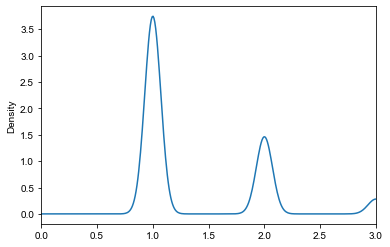

In [25]:
SR_Adults['total_of_special_requests'].sort_values(ascending=False).plot.kde()
plt.style.use('seaborn')
plt.xlim(0,3)


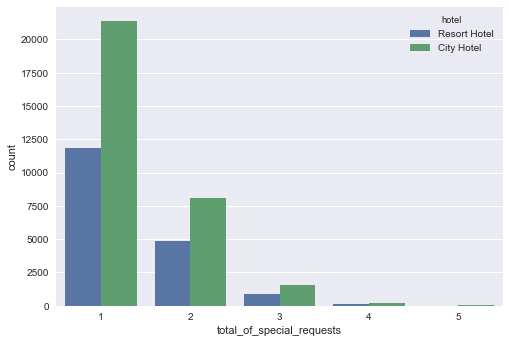

In [26]:
sns.countplot(SR_Adults['total_of_special_requests'],hue=SR_Adults['hotel'])
#sns.jointplot(SR_Adults['adults'],SR_Adults['total_of_special_requests'],kind='')

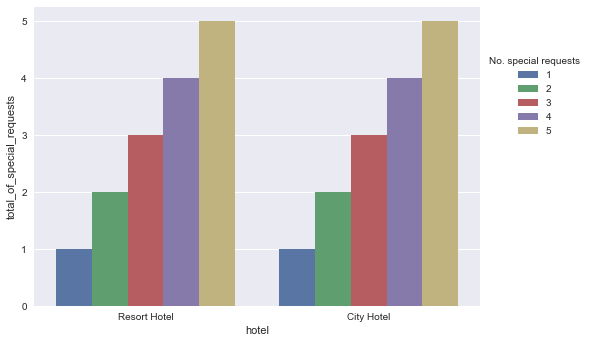

In [27]:
sns.barplot(SR_Adults['hotel'],SR_Adults['total_of_special_requests'],hue=SR_Adults['total_of_special_requests'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.7),title='No. special requests')

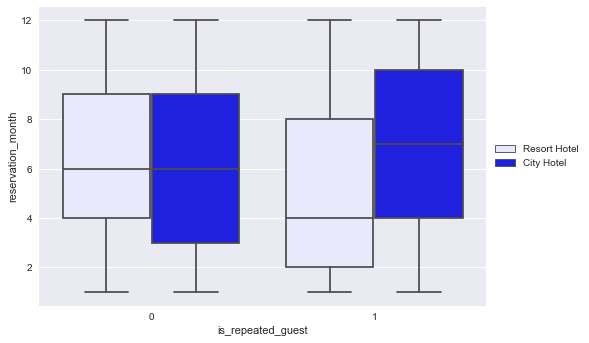

In [66]:
sns.boxplot(df['is_repeated_guest'],df['reservation_month'],hue=df['hotel'],color='blue')
plt.legend(loc='center left',bbox_to_anchor=[1.0,0.5])
plt.show()

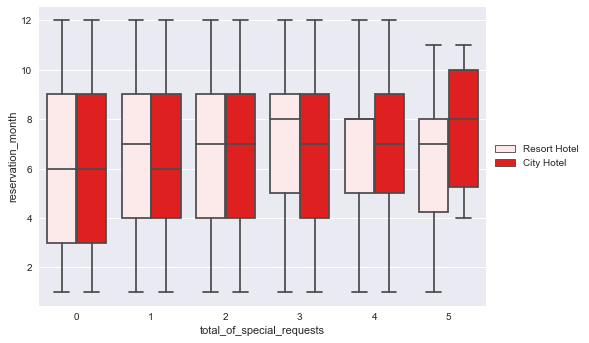

In [29]:
sns.boxplot(df['total_of_special_requests'],df['reservation_month'],hue=df['hotel'],color='red')
plt.legend(loc='center left',bbox_to_anchor=[1.0,0.5])


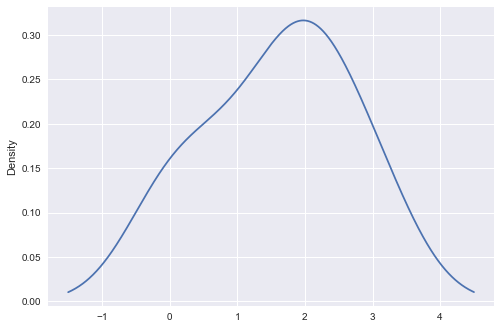

In [30]:
df['stays_in_week_nights'][0:10].sort_values(ascending=False).plot.kde(label='dff')

In [31]:
df['stays_in_week_nights'][0:10].sort_values(ascending=False)

9    3
8    3
7    2
6    2
5    2
4    2
3    1
2    1
1    0
0    0
Name: stays_in_week_nights, dtype: int64

#### What hotel do visitors like the most?
Here I have chosen the following features that will contribute to finding out what hotel do visitors like the most.

In [32]:
Popular_hotel = df[df['is_canceled']==0][['hotel','is_canceled','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest'
                   ,'previous_bookings_not_canceled','days_in_waiting_list']]

In [36]:
Popular_hotel['total']= Popular_hotel.iloc[:,4:7].sum(axis=1)

In [37]:
Popular_hotel[Popular_hotel['adults'] ==0][['adults','children','babies']]

,adults,children,babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
41952,0,2.0,0
46150,0,2.0,1
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


#### What countries are most vistors from?
To calculate this we will look at what country visitors are traveling from in order to see what countries most vistiors arrive from.

In [38]:
Vistors_Country = df[['country','adults','children','babies','is_canceled','hotel']]
Vistors_Country = Vistors_Country[Vistors_Country['is_canceled'] == 0 ]
Vistors_Country.head(4)

,country,adults,children,babies,is_canceled,hotel
0,PRT,2,0.0,0,0,Resort Hotel
1,PRT,2,0.0,0,0,Resort Hotel
2,GBR,1,0.0,0,0,Resort Hotel
3,GBR,1,0.0,0,0,Resort Hotel


In [39]:
Vistors_Country['total'] = Vistors_Country.iloc[:,1:4].sum(axis=1)

In [40]:
Vistors_Country.drop(['adults','children','babies'],axis =1 ,inplace =True)

Repeated guest is another important feature when understanding what hotel is most popular by Country in order to understand the trend.

In [41]:
Vistors_Country = pd.DataFrame(Vistors_Country.join(df['is_repeated_guest']))

In [42]:
Vistors_Country.pivot_table(columns=['is_repeated_guest'],index='country',values='total',aggfunc='count')

is_repeated_guest,0,1
country,,
ABW,2.0,NaN
AGO,141.0,16.0
AIA,1.0,NaN
ALB,10.0,NaN
AND,2.0,NaN
...,...,...
VEN,14.0,NaN
VNM,6.0,NaN
ZAF,48.0,1.0


In [43]:
Vistors_Country[['country','total','is_repeated_guest']].groupby('country').sum().sort_values(['total'],ascending=False).head(3)

,total,is_repeated_guest
country,,
PRT,37670.0,2677
GBR,19258.0,105
FRA,17299.0,69


In [45]:
Country_Repeated = Vistors_Country[['country','total','is_repeated_guest']].groupby('country').sum().sort_values(['is_repeated_guest'],ascending =False)

Getting the Top 10 Countries who have visited either of the hotels.

In [46]:
#Vistors_Country['country'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar')
Top10_VC = Vistors_Country[['country','total','hotel']].groupby(['country','hotel']).sum().sort_values(by=['total'],ascending=False).head(10)

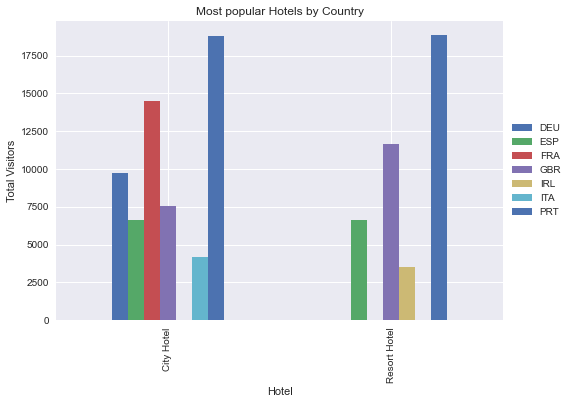

In [56]:
Top10_VC.pivot_table(columns='country',values='total',index='hotel').plot(kind='bar')
plt.ylabel('Total Visitors')
plt.xlabel('Hotel')
plt.title('Most popular Hotels by Country')
plt.legend(loc='center left',bbox_to_anchor=[1.0,0.5])
plt.show()

In [48]:
Monthly_Reservation = df.pivot_table(columns=['hotel'],values=['adults','children','babies'], index=['reservation_month'])
Monthly_Reservation.head(3)

adults                  babies                children  \
hotel             City Hotel Resort Hotel City Hotel Resort Hotel City Hotel   
reservation_month                                                              
1                   1.800717     1.869883   0.005792     0.007895   0.066474   
2                   1.810593     1.800913   0.005006     0.012177   0.099144   
3                   1.864268     1.784123   0.004232     0.008357   0.083888   

                                
hotel             Resort Hotel  
reservation_month               
1                     0.090058  
2                     0.131811  
3                     0.107799

In [49]:
Total_VPM = df.pivot_table(values=['adults','children','babies'], index=['reservation_month'],aggfunc='sum')
Total_VPM

,adults,babies,children
reservation_month,,,
1,19452,69,790.0
2,17129,71,1047.0
3,18739,58,942.0
4,18681,63,1138.0
5,19164,66,906.0
6,17454,86,949.0
7,23807,97,1943.0
8,22349,183,2247.0
9,17282,89,700.0


In [ ]:
#Total_VPM.corr()
plt.imshow(Monthly_Reservation.corr(),cmap='Greens')
plt.colorbar()

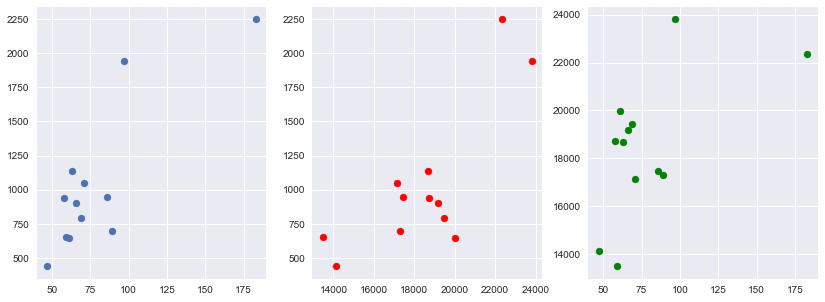

In [50]:
fig, axes = plt.subplots(1,3,figsize=(14,5))
babies = Total_VPM['babies'].values
children = Total_VPM['children'].values
adults = Total_VPM['adults'].values
axes[0].scatter(babies,children)
axes[1].scatter(adults,children,color='red')
axes[2].scatter(babies,adults,color='green')

plt.show()

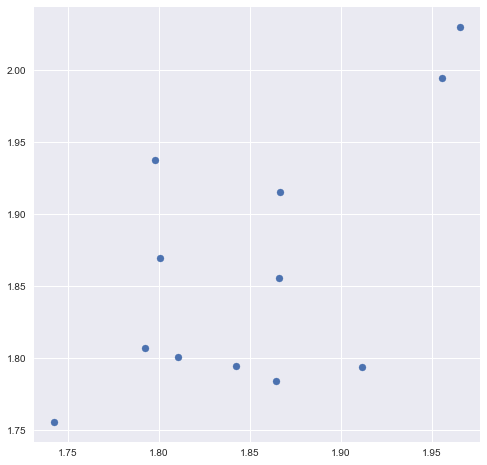

In [51]:
fig, axes = plt.subplots(figsize=(8,8))
axes.scatter(Monthly_Reservation.xs('adults',axis=1,level=0).iloc[:,0],Monthly_Reservation.xs('adults',axis=1,level=0).iloc[:,1])

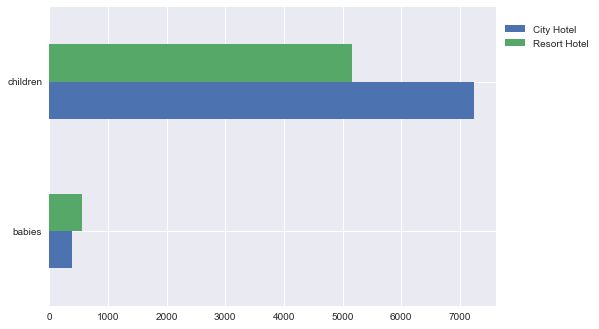

In [62]:
df.pivot_table(['children','babies'], columns=['hotel'],aggfunc='sum').plot(kind='barh')
plt.legend(loc='center left',bbox_to_anchor=[1.0,0.9])

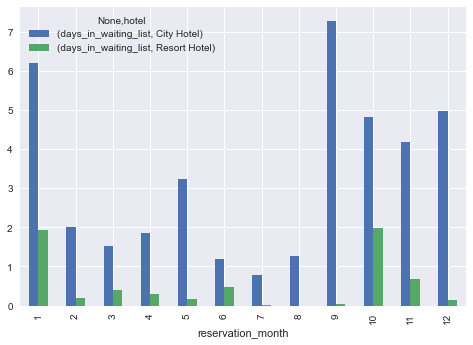

In [53]:
DWP = df.pivot_table(index=['reservation_month'],values=['days_in_waiting_list'],columns=['hotel'])
DWP.plot(kind='bar')

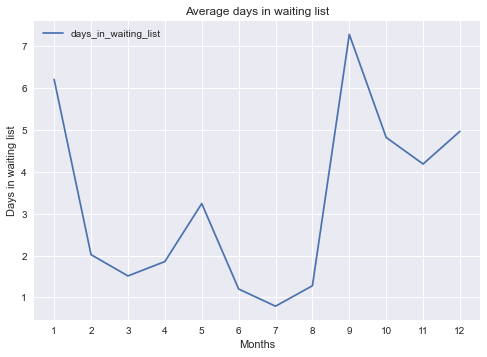

In [54]:
DWP.xs('City Hotel',axis=1,level=1).plot(label='City Hotel')
plt.title('Average days in waiting list')
plt.xlabel('Months')
plt.ylabel('Days in waiting list')
plt.xticks(np.arange(1,13))
plt.legend()
plt.show()

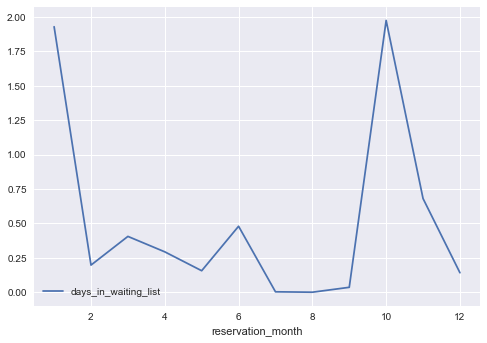

In [55]:
DWP.xs('Resort Hotel',axis=1,level=1).plot(label='Resort Hotel')

What month had more week night stays than weekend night stays

In [78]:
Week_Weekend = df[['stays_in_weekend_nights','stays_in_week_nights','reservation_status_date']]
Week_Weekend['reservation_status_date'] = pd.to_datetime(Week_Weekend['reservation_status_date'])

C:\Users\dwell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
Week_Weekend['stays_in_weekend_nights'].value_counts()

0     51895
2     33266
1     30615
4      1847
3      1252
6       152
5        77
8        58
7        19
9        10
10        7
12        5
13        2
16        2
18        1
14        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
Week_Weekend['month'] = Week_Weekend['reservation_status_date'].apply(lambda x:x.month)

In [ ]:
Week_Weekend.drop('reservation_status_date',axis=1,inplace=True)

Here I 

In [94]:
Week_Weekend[(Week_Weekend['stays_in_weekend_nights']==0)&
             (Week_Weekend['stays_in_week_nights']==0)]

,stays_in_weekend_nights,stays_in_week_nights,month
0,0,0,7
1,0,0,7
167,0,0,7
168,0,0,7
196,0,0,7
...,...,...,...
115483,0,0,7
117701,0,0,8
118029,0,0,8
118631,0,0,8


In [ ]:
Week_Weekend.drop(Week_Weekend[(Week_Weekend['stays_in_weekend_nights']==0)&
             (Week_Weekend['stays_in_week_nights']==0)].index,inplace=True)